In [98]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

<img src="equacao.png">

In [99]:
K = 1 # m²/s
deltat = 0.05 # s
deltax = 0.5 # m  
deltay = 0.5 # m
u = 1
v = 0
Lx = 30
Ly = 30
Tdes = 2
Ttotal = 6
a = 15
b = 15
Q = 80
alpha = u

In [100]:
x = np.linspace(0, Lx, int(Lx/deltax)+1)
y = np.linspace(0, Ly, int(Ly/deltay)+1)
t = np.linspace(0, Ttotal, int(Ttotal/deltat)+1)
print(x, y)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ] [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30. ]


In [101]:
listatempo = []
for _ in range(len(t)):
    matrix = np.zeros((len(y),len(x)))
    listatempo.append(matrix)

In [102]:
xdesp = int(a/deltax)
ydesp = int(b/deltay)
vx = int(Lx/deltax)
vy = int(Ly/deltay)
Tdesp = int(Tdes/deltat)

In [103]:
copia = listatempo.copy()
for m,matrix in enumerate(copia):
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            if(m != len(t)-1):
                
                if(i != 0 and i != vx and j != vy and j != 0):
                    if(i == xdesp and j == ydesp and m <= Tdesp):
                        t5 = Q/(deltax*deltay)
                    else:
                        t5 = 0
                    t1 = u*(copia[m][i][j+1] - copia[m][i][j-1])/(2*deltax)
                    t2 = v*(copia[m][i+1][j] - copia[m][i-1][j])/(2*deltay)
                    t3 = K*(copia[m][i][j+1] - 2*copia[m][i][j] + copia[m][i][j-1])/(deltax**2)
                    t4 = K*(copia[m][i+1][j] - 2*copia[m][i][j] + copia[m][i-1][j])/(deltay**2)
                    
                    copia[m+1][i][j] = copia[m][i][j] - deltat*(t1 + t2 - t3 - t4 - t5)
                    
                else:
                    if(j == 0):
                        copia[m+1][i][0] = copia[m+1][i][1]
                    elif(i == 0):
                        copia[m+1][0][j] = copia[m+1][1][j]
                    elif(j == vy):
                        copia[m+1][i][vy] = copia[m+1][i][vy - 1]
                    elif(i == vx):
                        copia[m+1][vx][j] = copia[m+1][vx - 1][j]
print("acabou")

# for matrix in copia[:20]:
#     print(matrix)


acabou


In [104]:
copia[2][30][30]

19.2

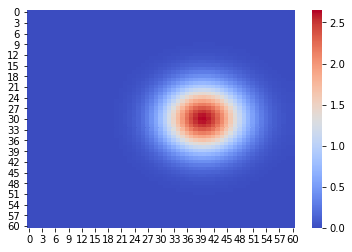

In [105]:
heatmap = sns.heatmap(copia[-1], annot = False, linewidths=0,cmap='coolwarm')

In [107]:
print(copia[int(5/deltat)+1][40][40])

0.622179192053236
